In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# PreProcessing Data
from sklearn.preprocessing import OneHotEncoder
from collections import Counter

#Geocoding
import requests
import geopandas as gpd
import geopy
import folium
from geopy.distance import distance

# Predictions Algorithms
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# Sampling
from imblearn.under_sampling import RandomUnderSampler

# Metrics

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Loading all the datasets

In [2]:
EV_cleaned_data = pd.read_csv("E:\Deakin\Cleaned_Australian_EV_Charging_Stations.csv")

In [3]:
EV_cleaned_data

,Unnamed: 0,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,...,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets
0,0,Chargefox Charging Station,-35.726720,145.659354,Cobram,2714,N.A,154 Campbell Rd,1.0,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,1,Secure Parking,-37.832108,144.969126,N.A,3205,Melbourne,"15-29 Bank Street, South Melbourne VIC 3205, A...",0.0,0.0,...,0.0,21.0,N.A,21.0,15,1,18,20,4,20
2,2,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0.0,0.0,...,0.0,0.0,N.A,2.0,20,2,18,20,20,20
3,3,Sorrento Community Centre,-38.338560,144.737043,N.A,3943,Melbourne,"860 Melbourne Rd, Sorrento VIC 3943, Australia",0.0,0.0,...,0.0,0.0,50.065,8.0,1,0,5,20,0,6
4,4,CTR Whittlesea,-37.510590,145.118412,N.A,3757,Melbourne,"74A Church St, Whittlesea VIC 3757, Australia",0.0,0.0,...,0.0,0.0,50.065,4.0,1,0,9,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,Brimbank Shopping Centre,-37.751827,144.775257,N.A,3023,Melbourne,"Brimbank Central Shopping Centre shop 81t, 28-...",2.0,0.0,...,0.0,0.0,N.A,2.0,1,0,10,20,1,7
387,387,QV Melbourne - Car Park,-37.810679,144.966601,N.A,3000,Melbourne,"180 Lonsdale Street, Melbourne VIC 3000, Austr...",0.0,0.0,...,0.0,3.0,N.A,3.0,16,7,17,20,20,20
388,388,Carlton,-37.803202,144.971757,N.A,3053,Melbourne,"11 Nicholson St, Carlton VIC 3053, Australia",0.0,0.0,...,0.0,0.0,N.A,2.0,16,11,18,20,20,20
389,389,RACV Solar,-38.197552,144.344603,N.A,3216,Geelong,"Units 5 & 6, 8 Lewalan St, Grovedale VIC 3216,...",1.0,0.0,...,0.0,0.0,22.0,1.0,2,0,5,15,0,3


In [4]:
print("\nData size :",EV_cleaned_data.shape)
print("\nNumber of records :",len(EV_cleaned_data))
print("\nNumber of atrributes :",len(EV_cleaned_data.columns))
print("\nDataset Information :", EV_cleaned_data.info())
EV_cleaned_data.describe()


Data size : (391, 24)

Number of records : 391

Number of atrributes : 24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  391 non-null    int64  
 1   Location Name               391 non-null    object 
 2   Latitude                    391 non-null    float64
 3   Longitude                   391 non-null    float64
 4   Town                        391 non-null    object 
 5   Postal Code                 391 non-null    object 
 6   City                        391 non-null    object 
 7   Address                     391 non-null    object 
 8   Plugs_Type2                 361 non-null    float64
 9   Plugs_Three_Phase           318 non-null    float64
 10  Plugs_CHAdeMO               373 non-null    float64
 11  Plugs_CCS/SAE               374 non-null    float64
 12  Plugs_Tesla      

,Unnamed: 0,Latitude,Longitude,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets
count,391.000000,391.000000,391.000000,361.000000,318.000000,373.000000,374.000000,351.000000,317.000000,318.000000,317.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,195.000000,-36.212610,145.253397,1.232687,0.025157,0.375335,0.414439,0.541311,0.003155,0.446541,2.899054,5.132992,1.828645,9.703325,15.429668,4.744246,8.347826
std,113.016223,5.167271,1.333809,1.979376,0.208636,0.805647,0.903912,1.170044,0.056166,1.856518,2.708852,6.641185,3.108103,6.362064,7.108286,6.843006,7.247758
min,0.000000,-38.522528,142.222919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97.500000,-37.925594,144.923857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,10.500000,0.000000,2.000000
50%,195.000000,-37.818612,144.983228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,9.000000,20.000000,2.000000,7.000000
75%,292.500000,-37.717484,145.146020,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,6.000000,2.000000,16.000000,20.000000,5.000000,13.500000
max,390.000000,-16.474254,153.515274,16.000000,3.000000,4.000000,6.000000,6.000000,1.000000,21.000000,21.000000,20.000000,16.000000,20.000000,20.000000,20.000000,20.000000


In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = EV_cleaned_data.select_dtypes(include=numerics)
print('Number of numerical columns are:', len(numeric_df.columns))
numeric_df

Number of numerical columns are: 17


,Unnamed: 0,Latitude,Longitude,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets
0,0,-35.726720,145.659354,1.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,0,0
1,1,-37.832108,144.969126,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0,15,1,18,20,4,20
2,2,-37.813437,144.955934,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,20,2,18,20,20,20
3,3,-38.338560,144.737043,0.0,0.0,4.0,4.0,0.0,0.0,0.0,8.0,1,0,5,20,0,6
4,4,-37.510590,145.118412,0.0,0.0,2.0,2.0,0.0,0.0,0.0,4.0,1,0,9,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,-37.751827,144.775257,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,10,20,1,7
387,387,-37.810679,144.966601,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,16,7,17,20,20,20
388,388,-37.803202,144.971757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16,11,18,20,20,20
389,389,-38.197552,144.344603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,5,15,0,3


In [6]:
my_map = folium.Map(location = [-37.51059,145.118412], width = 1000, height = 600)

In [7]:
# Latitude and longitude values passed in from dataset

for _, station in EV_cleaned_data.iterrows():
    folium.Marker(location = [station["Latitude"], station["Longitude"]],
                 popup = station["Location Name"],
                 tooltip = station["Location Name"]).add_to(my_map)

my_map

In [8]:
# Clustering existing EVCSs
from folium import Marker
from folium.plugins import MarkerCluster

my_map = folium.Map(location = [-37.884254, 144.736465], width = 1000, height = 600)
mc = MarkerCluster()

for _, station in EV_cleaned_data.iterrows():
    mc.add_child(Marker(location = [station["Latitude"], station["Longitude"]],
                 popup = station["Location Name"], tooltip = station["Location Name"]))

my_map.add_child(mc)

my_map

In [9]:
categorical = ['object']
categorical_df = EV_cleaned_data.select_dtypes(include=categorical)
print('Number of categorical columns are:', len(categorical_df.columns))
categorical_df

Number of categorical columns are: 7


,Location Name,Town,Postal Code,City,Address,Plugs_J-1772,Power 1
0,Chargefox Charging Station,Cobram,2714,N.A,154 Campbell Rd,NaN,NaN
1,Secure Parking,N.A,3205,Melbourne,"15-29 Bank Street, South Melbourne VIC 3205, A...",0,N.A
2,Lonsdale St,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0,N.A
3,Sorrento Community Centre,N.A,3943,Melbourne,"860 Melbourne Rd, Sorrento VIC 3943, Australia",0,50.065
4,CTR Whittlesea,N.A,3757,Melbourne,"74A Church St, Whittlesea VIC 3757, Australia",0,50.065
...,...,...,...,...,...,...,...
386,Brimbank Shopping Centre,N.A,3023,Melbourne,"Brimbank Central Shopping Centre shop 81t, 28-...",0,N.A
387,QV Melbourne - Car Park,N.A,3000,Melbourne,"180 Lonsdale Street, Melbourne VIC 3000, Austr...",0,N.A
388,Carlton,N.A,3053,Melbourne,"11 Nicholson St, Carlton VIC 3053, Australia",2,N.A
389,RACV Solar,N.A,3216,Geelong,"Units 5 & 6, 8 Lewalan St, Grovedale VIC 3216,...",0,22.0


In [10]:
# Performing label encoding on required features
from sklearn import preprocessing

categ = ['Location Name', 'Town','Postal Code', 'City', 'Address','Plugs_J-1772', 'Power 1']

label_encoder = preprocessing.LabelEncoder()

EV_cleaned_data[categ] = EV_cleaned_data[categ].apply(label_encoder.fit_transform)

In [11]:
EV_cleaned_data.drop(columns = {'Unnamed: 0','Address'},inplace = True)

In [12]:
EV_cleaned_data.fillna(0,inplace = True)

In [13]:
# Let us perform clustering using Kmeans CLustering

For cluster = 1, SSE/WCSS is 4546443.091213386
For cluster = 2, SSE/WCSS is 2131294.669729024
For cluster = 3, SSE/WCSS is 1619988.7426280552
For cluster = 4, SSE/WCSS is 1165082.222894017
For cluster = 5, SSE/WCSS is 899834.4969263057
For cluster = 6, SSE/WCSS is 764909.4586288785
For cluster = 7, SSE/WCSS is 682875.742228873
For cluster = 8, SSE/WCSS is 607235.8702977104
For cluster = 9, SSE/WCSS is 536247.8280530408
For cluster = 10, SSE/WCSS is 477942.95074819616


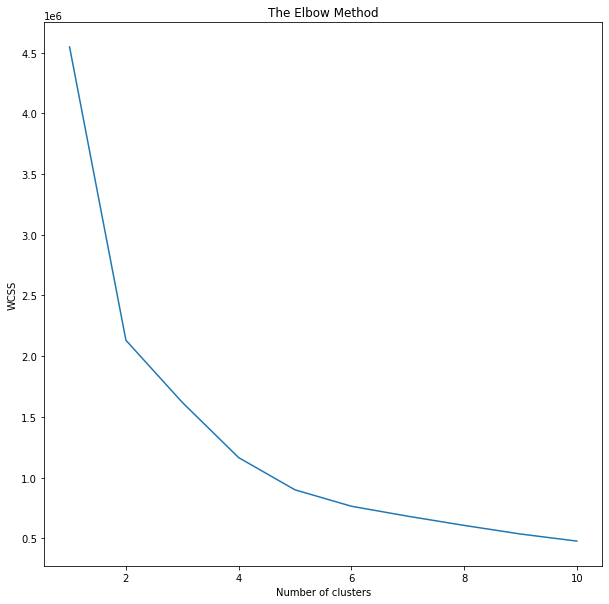

In [14]:
wcss = [] # Within cluster sum of squares (WCSS)
sse = {}

for i in range(1,11):
    model_new_df = KMeans(n_clusters = i, init = "k-means++")
    model_new_df.fit(EV_cleaned_data)
    wcss.append(model_new_df.inertia_)
    sse[i] = model_new_df.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))
  
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print('Best K-value (using KneeLocator) utilizing k-means:',kl.elbow)

Best K-value (using KneeLocator) utilizing k-means: 4


In [16]:
centers = np.array(model_new_df.cluster_centers_)
k_model = KMeans(n_clusters = 4, init = "k-means++",  max_iter = 50, n_init = 10, random_state = 0)
clustered_data = k_model.fit_predict(EV_cleaned_data)

In [17]:
predict_kmeans = k_model.labels_
print(predict_kmeans)

[0 1 0 1 3 1 1 2 3 1 3 0 2 0 1 3 1 1 3 3 1 1 0 3 2 2 0 0 0 0 1 3 0 0 2 1 3
 1 1 3 2 3 0 2 2 2 0 0 2 0 0 0 0 0 2 2 3 3 3 1 2 0 1 2 0 3 2 1 0 2 1 0 1 2
 2 0 0 2 2 0 1 3 0 0 2 2 1 1 0 1 0 1 0 2 2 3 1 1 0 3 0 1 0 0 2 3 0 3 2 0 3
 3 3 0 3 3 1 0 0 1 3 3 2 0 1 2 3 0 0 3 1 2 2 2 2 1 2 1 1 0 3 3 0 0 0 0 0 0
 3 2 0 2 1 2 1 1 0 3 3 2 0 2 1 3 1 2 2 3 0 0 0 2 2 2 1 2 1 0 1 3 1 0 0 1 1
 3 3 3 1 3 2 3 1 0 3 2 1 2 1 1 2 1 0 0 2 2 3 2 1 1 1 2 3 0 2 1 0 2 2 2 2 1
 0 1 1 3 2 0 1 1 0 3 1 3 3 3 0 3 1 3 2 2 1 0 2 2 0 1 0 0 0 3 3 1 1 3 1 2 0
 3 3 0 0 2 3 1 2 1 1 2 2 3 2 2 2 1 2 0 2 2 3 2 3 3 0 1 0 2 2 1 0 0 2 3 3 0
 0 0 2 2 3 1 1 1 1 1 0 0 3 3 2 1 0 2 3 0 2 2 3 3 0 0 3 1 0 1 1 3 1 2 2 1 0
 1 1 3 0 0 1 3 3 2 3 0 1 3 3 2 0 1 3 0 0 2 3 0 1 3 1 1 2 1 1 2 3 0 0 0 0 2
 3 1 0 0 3 3 0 0 0 0 3 0 0 3 2 3 0 2 0 1 1]


In [18]:
# Frequency count of the Output clusters
unique, counts = np.unique(predict_kmeans, return_counts=True)
print('Unique sample counts per cluster:', dict(zip(unique, counts)))

Unique sample counts per cluster: {0: 113, 1: 97, 2: 93, 3: 88}


In [19]:
#Append the Clusters 

EV_cleaned_data["Clusters"] = clustered_data
EV_cleaned_data.head()

,Location Name,Latitude,Longitude,Town,Postal Code,City,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,Clusters
0,51,-35.726720,145.659354,11,0,9,1.0,0.0,0.0,0.0,...,0.0,25,0.0,0,0,0,0,0,0,0
1,247,-37.832108,144.969126,38,92,8,0.0,0.0,0.0,0.0,...,21.0,24,21.0,15,1,18,20,4,20,1
2,160,-37.813437,144.955934,38,2,8,0.0,0.0,0.0,0.0,...,0.0,24,2.0,20,2,18,20,20,20,0
3,256,-38.338560,144.737043,38,146,8,0.0,0.0,4.0,4.0,...,0.0,17,8.0,1,0,5,20,0,6,1
4,41,-37.510590,145.118412,38,123,8,0.0,0.0,2.0,2.0,...,0.0,17,4.0,1,0,9,20,0,1,3


In [20]:
mapping = {0:'Severe', 1:'High', 2:'Moderate' , 3:'Low'}

In [21]:
clus_type = EV_cleaned_data[['Clusters']]
clus_type['cluster_density_level'] = clus_type['Clusters'].replace(mapping)

In [22]:
EV_cleaned_data['cluster_density_level'] = clus_type['cluster_density_level']

In [23]:
EV_cleaned_data

,Location Name,Latitude,Longitude,Town,Postal Code,City,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,Clusters,cluster_density_level
0,51,-35.726720,145.659354,11,0,9,1.0,0.0,0.0,0.0,...,25,0.0,0,0,0,0,0,0,0,Severe
1,247,-37.832108,144.969126,38,92,8,0.0,0.0,0.0,0.0,...,24,21.0,15,1,18,20,4,20,1,High
2,160,-37.813437,144.955934,38,2,8,0.0,0.0,0.0,0.0,...,24,2.0,20,2,18,20,20,20,0,Severe
3,256,-38.338560,144.737043,38,146,8,0.0,0.0,4.0,4.0,...,17,8.0,1,0,5,20,0,6,1,High
4,41,-37.510590,145.118412,38,123,8,0.0,0.0,2.0,2.0,...,17,4.0,1,0,9,20,0,1,3,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,34,-37.751827,144.775257,38,14,8,2.0,0.0,0.0,0.0,...,24,2.0,1,0,10,20,1,7,0,Severe
387,223,-37.810679,144.966601,38,2,8,0.0,0.0,0.0,0.0,...,24,3.0,16,7,17,20,20,20,2,Moderate
388,46,-37.803202,144.971757,38,30,8,0.0,0.0,0.0,0.0,...,24,2.0,16,11,18,20,20,20,0,Severe
389,233,-38.197552,144.344603,38,96,4,1.0,0.0,0.0,0.0,...,8,1.0,2,0,5,15,0,3,1,High


In [24]:
# Dropping unwanted columns for prediction.

pred_df = EV_cleaned_data.drop(['cluster_density_level','Latitude','Longitude','Location Name','Town','City'], axis=1)

In [25]:
pred_df

,Postal Code,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,Clusters
0,0,1.0,0.0,0.0,0.0,0.0,5,0.0,0.0,25,0.0,0,0,0,0,0,0,0
1,92,0.0,0.0,0.0,0.0,0.0,1,0.0,21.0,24,21.0,15,1,18,20,4,20,1
2,2,0.0,0.0,0.0,0.0,2.0,1,0.0,0.0,24,2.0,20,2,18,20,20,20,0
3,146,0.0,0.0,4.0,4.0,0.0,1,0.0,0.0,17,8.0,1,0,5,20,0,6,1
4,123,0.0,0.0,2.0,2.0,0.0,1,0.0,0.0,17,4.0,1,0,9,20,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,14,2.0,0.0,0.0,0.0,0.0,1,0.0,0.0,24,2.0,1,0,10,20,1,7,0
387,2,0.0,0.0,0.0,0.0,0.0,1,0.0,3.0,24,3.0,16,7,17,20,20,20,2
388,30,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,24,2.0,16,11,18,20,20,20,0
389,96,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,8,1.0,2,0,5,15,0,3,1


<AxesSubplot:>

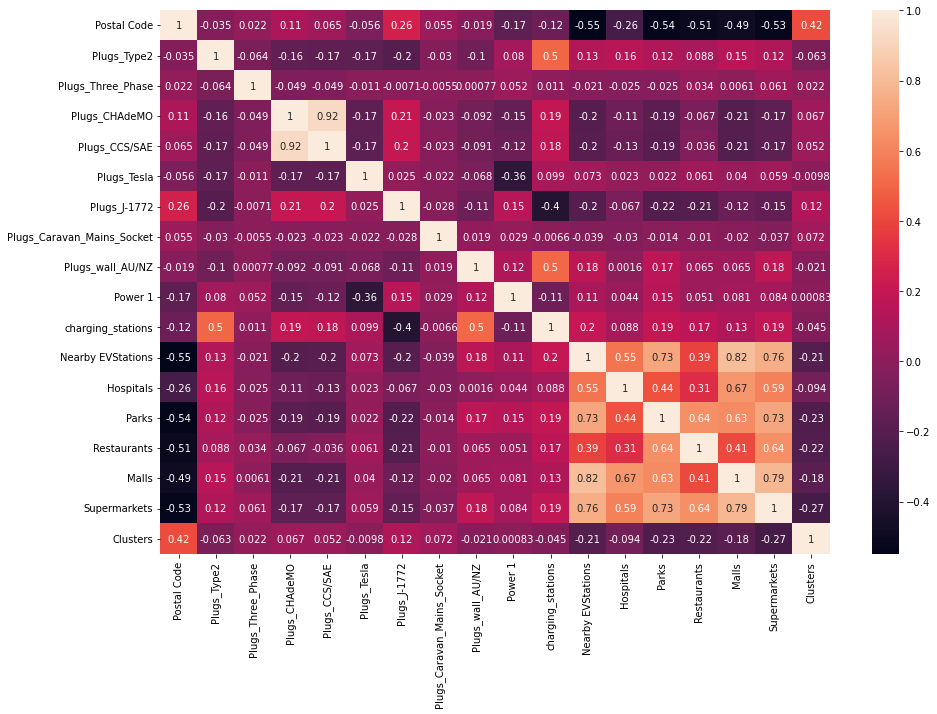

In [26]:
#Correlation matrix
pred_df.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(pred_df.corr(), annot = True)

In [27]:
correlation = pred_df.corr()['Clusters'].abs().sort_values(ascending = False)
correlation

Clusters                      1.000000
Postal Code                   0.424921
Supermarkets                  0.265228
Parks                         0.225460
Restaurants                   0.216928
Nearby EVStations             0.209830
Malls                         0.182157
Plugs_J-1772                  0.123582
Hospitals                     0.093855
Plugs_Caravan_Mains_Socket    0.071998
Plugs_CHAdeMO                 0.066559
Plugs_Type2                   0.063098
Plugs_CCS/SAE                 0.051625
charging_stations             0.045358
Plugs_Three_Phase             0.021832
Plugs_wall_AU/NZ              0.021156
Plugs_Tesla                   0.009754
Power 1                       0.000833
Name: Clusters, dtype: float64

In [28]:
# check if there are any missing values in the dataframe?
print(" \nCount total number of missing values in the DataFrame : \n\n", pred_df.isnull().sum().sum())

 
Count total number of missing values in the DataFrame : 

 0


In [29]:
# Series to Supervised conversion

def series_to_supervised(data,n_in=1,n_out=1,dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = pd.concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [30]:
# Feature set and Target Variable Creation
dataset = pred_df
dataset = series_to_supervised(dataset)
data = pd.DataFrame(dataset)

In [31]:
data

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,25.0,...,21.0,24.0,21.0,15.0,1.0,18.0,20.0,4.0,20.0,1.0
1,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0,24.0,...,0.0,24.0,2.0,20.0,2.0,18.0,20.0,20.0,20.0,0.0
2,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,24.0,...,0.0,17.0,8.0,1.0,0.0,5.0,20.0,0.0,6.0,1.0
3,146.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,17.0,...,0.0,17.0,4.0,1.0,0.0,9.0,20.0,0.0,1.0,3.0
4,123.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,17.0,...,1.0,24.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,131.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,24.0,...,0.0,24.0,2.0,1.0,0.0,10.0,20.0,1.0,7.0,0.0
386,14.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,...,3.0,24.0,3.0,16.0,7.0,17.0,20.0,20.0,20.0,2.0
387,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,24.0,...,0.0,24.0,2.0,16.0,11.0,18.0,20.0,20.0,20.0,0.0
388,30.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,24.0,...,0.0,8.0,1.0,2.0,0.0,5.0,15.0,0.0,3.0,1.0


In [32]:
data = data.drop(17, axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,25.0,...,21.0,24.0,21.0,15.0,1.0,18.0,20.0,4.0,20.0,1.0
1,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0,24.0,...,0.0,24.0,2.0,20.0,2.0,18.0,20.0,20.0,20.0,0.0
2,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,24.0,...,0.0,17.0,8.0,1.0,0.0,5.0,20.0,0.0,6.0,1.0
3,146.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,17.0,...,0.0,17.0,4.0,1.0,0.0,9.0,20.0,0.0,1.0,3.0
4,123.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,17.0,...,1.0,24.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,131.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,24.0,...,0.0,24.0,2.0,1.0,0.0,10.0,20.0,1.0,7.0,0.0
386,14.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,...,3.0,24.0,3.0,16.0,7.0,17.0,20.0,20.0,20.0,2.0
387,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,24.0,...,0.0,24.0,2.0,16.0,11.0,18.0,20.0,20.0,20.0,0.0
388,30.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,24.0,...,0.0,8.0,1.0,2.0,0.0,5.0,15.0,0.0,3.0,1.0


In [33]:
# Preprocessing
# Splitting data into features and target variable

X = data # Features
y = data[35] # Target variable

In [34]:
print(X)
print(X.shape)

        0    1    2    3    4    5    6    7     8     9   ...    26    27  \
0      0.0  1.0  0.0  0.0  0.0  0.0  5.0  0.0   0.0  25.0  ...  21.0  24.0   
1     92.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  21.0  24.0  ...   0.0  24.0   
2      2.0  0.0  0.0  0.0  0.0  2.0  1.0  0.0   0.0  24.0  ...   0.0  17.0   
3    146.0  0.0  0.0  4.0  4.0  0.0  1.0  0.0   0.0  17.0  ...   0.0  17.0   
4    123.0  0.0  0.0  2.0  2.0  0.0  1.0  0.0   0.0  17.0  ...   1.0  24.0   
..     ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  ...   ...   ...   
385  131.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  24.0  ...   0.0  24.0   
386   14.0  2.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0  24.0  ...   3.0  24.0   
387    2.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   3.0  24.0  ...   0.0  24.0   
388   30.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0   0.0  24.0  ...   0.0   8.0   
389   96.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0   8.0  ...   1.0  24.0   

       28    29    30    31    32    33    34   35  
0    21.0 

In [35]:
print(y)
print(y.shape)

0      1.0
1      0.0
2      1.0
3      3.0
4      1.0
      ... 
385    0.0
386    2.0
387    0.0
388    1.0
389    1.0
Name: 35, Length: 390, dtype: float64
(390,)


In [36]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (273, 35)
X_test shape  is :  (117, 35)
y_train shape is :  (273,)
y_test shape is  :  (117,)


In [38]:
# Undersampling

under = RandomUnderSampler(sampling_strategy='majority')
X_new, y_new = under.fit_resample(X_train, y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0.0: 76, 1.0: 71, 2.0: 67, 3.0: 59})
Resampled dataset shape Counter({1.0: 71, 2.0: 67, 0.0: 59, 3.0: 59})


In [39]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
M_train, M_test, N_train, N_test = train_test_split(X_new, y_new, test_size=0.3, random_state=1) # 70% training and 30% test

### 1. Random Forest

In [40]:
# Best Random Forest Model

rfclf = RandomForestClassifier()
rfclf.fit(M_train,N_train)

RandomForestClassifier()

In [41]:
# Predicted Outcome
n_pred = rfclf.predict(M_test)

In [42]:
print('Random Forest')
print(confusion_matrix(N_test,n_pred))
print(classification_report(N_test,n_pred))

# Model Accuracy: how often is the classifier correct?
base_accuracy_rf = metrics.accuracy_score(N_test, n_pred)
print("Accuracy:", base_accuracy_rf)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, n_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, n_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, n_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, n_pred))

Random Forest
[[20  1  0  0]
 [ 0 16  0  0]
 [ 0  0 18  0]
 [ 0  0  2 20]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        21
         1.0       0.94      1.00      0.97        16
         2.0       0.90      1.00      0.95        18
         3.0       1.00      0.91      0.95        22

    accuracy                           0.96        77
   macro avg       0.96      0.97      0.96        77
weighted avg       0.96      0.96      0.96        77

Accuracy: 0.961038961038961
Precision: 0.9644003055767763
Recall: 0.961038961038961
F1 Score: 0.9611424535653067
Mean Absolute Error: 0.03896103896103896


### 2.K-Nearest Neigbours

In [43]:
# Best K-Nearest Neighbours Model
from sklearn.neighbors import KNeighborsClassifier  
knnclf = KNeighborsClassifier()
knnclf.fit(M_train,N_train)

KNeighborsClassifier()

In [44]:
# Predicted Outcome
knn_pred = knnclf.predict(M_test)

In [45]:
print('K-Nearest Neighbours (KNN)')
print(confusion_matrix(N_test,knn_pred))
print(classification_report(N_test,knn_pred))

# Model Accuracy: how often is the classifier correct?

base_accuracy_knn = metrics.accuracy_score(N_test, knn_pred)
print("Accuracy:", base_accuracy_knn)

                                       
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, knn_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, knn_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, knn_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, knn_pred))

K-Nearest Neighbours (KNN)
[[13  0  8  0]
 [ 1 12  1  2]
 [ 5  2 10  1]
 [ 0 14  0  8]]
              precision    recall  f1-score   support

         0.0       0.68      0.62      0.65        21
         1.0       0.43      0.75      0.55        16
         2.0       0.53      0.56      0.54        18
         3.0       0.73      0.36      0.48        22

    accuracy                           0.56        77
   macro avg       0.59      0.57      0.56        77
weighted avg       0.61      0.56      0.56        77

Accuracy: 0.5584415584415584
Precision: 0.6064837418220876
Recall: 0.5584415584415584
F1 Score: 0.5555021964112873
Mean Absolute Error: 0.8181818181818182


### 3. XgBoost

In [46]:
# Best XGBoost Model
from xgboost import XGBClassifier  

xgbclf = XGBClassifier()  

xgbclf.fit(M_train,N_train)

[13:09:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
# Predicted Outcome
xgb_pred = xgbclf.predict(M_test)

In [48]:
print('XGBoost')
print(confusion_matrix(N_test,xgb_pred))
print(classification_report(N_test,xgb_pred))

# Model Accuracy: how often is the classifier correct?
base_accuracy_xg = metrics.accuracy_score(N_test, xgb_pred)
print("Accuracy:", base_accuracy_xg)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, xgb_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, xgb_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, xgb_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, xgb_pred))

XGBoost
[[21  0  0  0]
 [ 0 16  0  0]
 [ 0  0 18  0]
 [ 0  0  0 22]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        22

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Absolute Error: 0.0


### 4. SVM

In [49]:
# Best Support Vector Machine Model
from sklearn.svm import SVC
svmclf = SVC()
svmclf.fit(M_train,N_train)

SVC()

In [50]:
# Predicted Outcome
svm_pred = svmclf.predict(M_test)

In [51]:
print('Support Vector Machine (SVM)')
print(confusion_matrix(N_test,svm_pred))
print(classification_report(N_test,svm_pred))

# Model Accuracy: how often is the classifier correct?
base_accuracy_svm = metrics.accuracy_score(N_test, svm_pred)
print("Accuracy:", base_accuracy_svm)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, svm_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, svm_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, svm_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, svm_pred))

Support Vector Machine (SVM)
[[ 1  0 20  0]
 [ 0 15  1  0]
 [ 0  3 15  0]
 [ 0 22  0  0]]
              precision    recall  f1-score   support

         0.0       1.00      0.05      0.09        21
         1.0       0.38      0.94      0.54        16
         2.0       0.42      0.83      0.56        18
         3.0       0.00      0.00      0.00        22

    accuracy                           0.40        77
   macro avg       0.45      0.45      0.30        77
weighted avg       0.45      0.40      0.27        77

Accuracy: 0.4025974025974026
Precision: 0.44805194805194803
Recall: 0.4025974025974026
F1 Score: 0.265980772474279
Mean Absolute Error: 1.1428571428571428


### 5. Logistic Regression

In [52]:
# Best Logistic Regression

logreg = LogisticRegression()
logreg.fit(M_train,N_train)

LogisticRegression()

In [53]:
# Predicted Outcome
log_pred = logreg.predict(M_test)

In [54]:
print('Logistic Regression')
print(confusion_matrix(N_test,log_pred))
print(classification_report(N_test,log_pred))

# Model Accuracy: how often is the classifier correct?
base_accuracy_log = metrics.accuracy_score(N_test, log_pred)
print("Accuracy:", base_accuracy_log)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, log_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, log_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, log_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, log_pred))

Logistic Regression
[[16  3  2  0]
 [ 0 13  1  2]
 [ 2  1 14  1]
 [ 0  2  1 19]]
              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82        21
         1.0       0.68      0.81      0.74        16
         2.0       0.78      0.78      0.78        18
         3.0       0.86      0.86      0.86        22

    accuracy                           0.81        77
   macro avg       0.80      0.80      0.80        77
weighted avg       0.81      0.81      0.81        77

Accuracy: 0.8051948051948052
Precision: 0.8131692868534973
Recall: 0.8051948051948052
F1 Score: 0.8067075781361496
Mean Absolute Error: 0.2987012987012987


## HyperTune the paramters for the above ML models.

### 1. Random Forest

In [55]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,None],
    'n_estimators': [30,35,40,45,50],
    'max_features' :['auto','log2']}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, verbose = 2 , cv =10)

In [56]:
grid_search.fit(M_train,N_train)
grid_search.best_params_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 40}

In [57]:
# Predicted Outcome
n_pred_cv = grid_search.predict(M_test)

In [58]:
print('Random Forest GridSearchCV')

print(confusion_matrix(N_test,n_pred_cv))
print(classification_report(N_test,n_pred_cv))

# Model Accuracy: how often is the classifier correct?
grid_accuracy_rf = metrics.accuracy_score(N_test, n_pred_cv)
print("Accuracy:",grid_accuracy_rf)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, n_pred_cv, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, n_pred_cv, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, n_pred_cv, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, n_pred_cv))

Random Forest GridSearchCV
[[20  1  0  0]
 [ 0 15  1  0]
 [ 0  1 17  0]
 [ 0  0  2 20]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        21
         1.0       0.88      0.94      0.91        16
         2.0       0.85      0.94      0.89        18
         3.0       1.00      0.91      0.95        22

    accuracy                           0.94        77
   macro avg       0.93      0.94      0.93        77
weighted avg       0.94      0.94      0.94        77

Accuracy: 0.935064935064935
Precision: 0.9404889228418639
Recall: 0.935064935064935
F1 Score: 0.9362455004386885
Mean Absolute Error: 0.06493506493506493


In [59]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy_rf - base_accuracy_rf) / base_accuracy_rf))

Improvement of -2.70%.


### 2.K-Nearest Neigbours

In [60]:
knn = KNeighborsClassifier()
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

In [61]:
# defining parameter range
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
  
# fitting the model for grid search
grid_search_knn= knn_grid.fit(M_train,N_train)
grid_search_knn.best_params_

{'n_neighbors': 11}

In [62]:
# Predicted Outcome

n_pred_knn = grid_search_knn.predict(M_test)

In [63]:
print('K-Nearest Neighbours (KNN) Grid SearchCV')

print(confusion_matrix(N_test,n_pred_knn))
print(classification_report(N_test,n_pred_knn))

# Model Accuracy: how often is the classifier correct?
grid_accuracy_knn = metrics.accuracy_score(N_test, n_pred_knn)
print("Accuracy:",grid_accuracy_knn )

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, n_pred_knn, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, n_pred_knn, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, n_pred_knn, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, n_pred_knn))

K-Nearest Neighbours (KNN) Grid SearchCV
[[15  0  6  0]
 [ 0 13  2  1]
 [ 9  2  6  1]
 [ 0 19  0  3]]
              precision    recall  f1-score   support

         0.0       0.62      0.71      0.67        21
         1.0       0.38      0.81      0.52        16
         2.0       0.43      0.33      0.38        18
         3.0       0.60      0.14      0.22        22

    accuracy                           0.48        77
   macro avg       0.51      0.50      0.45        77
weighted avg       0.52      0.48      0.44        77

Accuracy: 0.4805194805194805
Precision: 0.5215186074429773
Recall: 0.4805194805194805
F1 Score: 0.441024531024531
Mean Absolute Error: 0.974025974025974


In [64]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy_knn - base_accuracy_knn) / base_accuracy_knn))

Improvement of -13.95%.


### 3. XgBoost

In [65]:
xgb_model = XGBClassifier()

In [66]:
parameters = {'learning_rate': [0.05], 
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], 
              'missing':[-999],
              'seed': [1337]}


xg_grid = GridSearchCV(xgb_model, parameters, n_jobs=-1, cv=10, scoring='accuracy')

In [67]:
grid_search_xg= xg_grid.fit(M_train,N_train)
grid_search_xg.best_params_

[13:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 5,
 'seed': 1337,
 'silent': 1,
 'subsample': 0.8}

In [68]:
# Predicted Outcome

n_pred_xg = grid_search_xg.predict(M_test)

In [69]:
print('XGBoost Gridsearch CV')
print(confusion_matrix(N_test,n_pred_xg))
print(classification_report(N_test,n_pred_xg))

# Model Accuracy: how often is the classifier correct?
grid_accuracy_xg = metrics.accuracy_score(N_test, n_pred_xg)
print("Accuracy:", grid_accuracy_xg)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, n_pred_xg, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, n_pred_xg, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, n_pred_xg, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, n_pred_xg))

XGBoost Gridsearch CV
[[21  0  0  0]
 [ 0 16  0  0]
 [ 0  0 18  0]
 [ 0  0  3 19]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        16
         2.0       0.86      1.00      0.92        18
         3.0       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.96      0.97      0.96        77
weighted avg       0.97      0.96      0.96        77

Accuracy: 0.961038961038961
Precision: 0.9666048237476809
Recall: 0.961038961038961
F1 Score: 0.9611120586730343
Mean Absolute Error: 0.03896103896103896


In [70]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy_xg - base_accuracy_xg) / base_accuracy_xg))

Improvement of -3.90%.


### 4. SVM

In [71]:
svm = SVC()
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svm = GridSearchCV( svm, param_grid, n_jobs=-1, cv=10, scoring='accuracy')
  

In [72]:
grid_search_svm= grid_svm.fit(M_train,N_train)
grid_search_svm.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [73]:
# Predicted Outcome
grid_svm_pred= grid_search_svm.predict(M_test)

In [74]:
print('Support Vector Machine (SVM) GridSearch CV')
print(confusion_matrix(N_test,grid_svm_pred))
print(classification_report(N_test,grid_svm_pred))

# Model Accuracy: how often is the classifier correct?
grid_accuracy_svm = metrics.accuracy_score(N_test, grid_svm_pred)
print("Accuracy:", grid_accuracy_svm)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, grid_svm_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, grid_svm_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, grid_svm_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, grid_svm_pred))

Support Vector Machine (SVM) GridSearch CV
[[13  2  6  0]
 [ 1 12  1  2]
 [ 4  2 11  1]
 [ 0  5  1 16]]
              precision    recall  f1-score   support

         0.0       0.72      0.62      0.67        21
         1.0       0.57      0.75      0.65        16
         2.0       0.58      0.61      0.59        18
         3.0       0.84      0.73      0.78        22

    accuracy                           0.68        77
   macro avg       0.68      0.68      0.67        77
weighted avg       0.69      0.68      0.68        77

Accuracy: 0.6753246753246753
Precision: 0.6916479510464473
Recall: 0.6753246753246753
F1 Score: 0.6785949712778981
Mean Absolute Error: 0.5454545454545454


In [75]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy_svm - base_accuracy_svm) / base_accuracy_svm))

Improvement of 67.74%.


### 5. Logistic Regression.

In [76]:
logreg = LogisticRegression()

In [77]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [78]:
grid_log = GridSearchCV(logreg, param_grid = parameters,scoring='accuracy',cv=10) 

In [79]:
grid_search_log= grid_log.fit(M_train,N_train)
grid_search_log.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [80]:
# Predicted Outcome
grid_log_pred = grid_search_log.predict(M_test)

In [81]:
print('Logistic Regression GridSearch CV')
print(confusion_matrix(N_test,grid_log_pred))
print(classification_report(N_test,grid_log_pred))

# Model Accuracy: how often is the classifier correct?
grid_accuracy_log = metrics.accuracy_score(N_test, grid_log_pred)
print("Accuracy:", grid_accuracy_log)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(N_test, grid_log_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(N_test, grid_log_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(N_test, grid_log_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(N_test, grid_log_pred))

Logistic Regression GridSearch CV
[[18  3  0  0]
 [ 0 15  1  0]
 [ 0  1 15  2]
 [ 0  0  3 19]]
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        21
         1.0       0.79      0.94      0.86        16
         2.0       0.79      0.83      0.81        18
         3.0       0.90      0.86      0.88        22

    accuracy                           0.87        77
   macro avg       0.87      0.87      0.87        77
weighted avg       0.88      0.87      0.87        77

Accuracy: 0.8701298701298701
Precision: 0.8798294437392182
Recall: 0.8701298701298701
F1 Score: 0.871887742319636
Mean Absolute Error: 0.12987012987012986


In [82]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy_log - base_accuracy_log) / base_accuracy_log))

Improvement of 8.06%.


### Tabulate the results

In [83]:
from tabulate import tabulate

In [84]:
base_accuracies = ['Base Accuracy',base_accuracy_rf,base_accuracy_knn,base_accuracy_xg,base_accuracy_svm,base_accuracy_log]
Names = ['Classifier', 'Random Forest', 'KNN', 'XgBoost', 'SVM', 'Logistic Regression']
grid_accuracies = ['Grid Accuracy', grid_accuracy_rf,grid_accuracy_knn,grid_accuracy_xg, grid_accuracy_svm, grid_accuracy_log]

In [85]:
!pip install tabulate

In [86]:
table = zip(Names, base_accuracies, grid_accuracies)

In [87]:
print(tabulate(table, headers= 'firstrow', floatfmt=".4f" ,tablefmt = 'fancy_grid' ))

╒═════════════════════╤═════════════════╤═════════════════╕
│ Classifier          │   Base Accuracy │   Grid Accuracy │
╞═════════════════════╪═════════════════╪═════════════════╡
│ Random Forest       │          0.9610 │          0.9351 │
├─────────────────────┼─────────────────┼─────────────────┤
│ KNN                 │          0.5584 │          0.4805 │
├─────────────────────┼─────────────────┼─────────────────┤
│ XgBoost             │          1.0000 │          0.9610 │
├─────────────────────┼─────────────────┼─────────────────┤
│ SVM                 │          0.4026 │          0.6753 │
├─────────────────────┼─────────────────┼─────────────────┤
│ Logistic Regression │          0.8052 │          0.8701 │
╘═════════════════════╧═════════════════╧═════════════════╛


#### Based on the table, we can deduct that XgBoost classifier performed the best among all the five ML algorithms followed by Random Forest

In [88]:
n_pred_xg

array([2., 0., 2., 3., 3., 2., 2., 0., 2., 2., 3., 1., 0., 3., 0., 2., 3.,
       0., 2., 3., 1., 1., 2., 3., 3., 1., 0., 3., 2., 3., 1., 0., 1., 1.,
       1., 3., 0., 3., 3., 2., 2., 2., 1., 0., 0., 3., 2., 0., 3., 0., 0.,
       1., 0., 0., 0., 0., 2., 1., 1., 2., 2., 3., 1., 0., 0., 2., 3., 0.,
       3., 0., 1., 3., 1., 2., 2., 1., 2.])

In [89]:
mapping = {0:'Severe', 1:'High', 2:'Moderate' , 3:'Low'}

In [90]:
final_predicted_df = pd.DataFrame(n_pred_xg)

In [91]:
final_predicted_df.rename(columns = { 0 : 'Cluster Level'},inplace = True)

In [92]:
final_predicted_df['cluster_density_level'] = final_predicted_df['Cluster Level'].replace(mapping)
final_predicted_df

,Cluster Level,cluster_density_level
0,2.0,Moderate
1,0.0,Severe
2,2.0,Moderate
3,3.0,Low
4,3.0,Low
...,...,...
72,1.0,High
73,2.0,Moderate
74,2.0,Moderate
75,1.0,High


In [93]:
# Save the predicted column back to the test dataset.
final_predicted_df.to_csv("Predicted Cluster level on test data.csv")
print('Your File has been saved')

Your File has been saved
